<a href="https://colab.research.google.com/github/cristiangodoyangel/DataScience-Salarios-Latam/blob/main/Latam_Sueldos_Data_Science_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧠 Mejores Sueldos en Data Science (LATAM y Global)
Análisis de más de 3.700 registros reales de salarios en Ciencia de Datos a nivel global y regional.  
El enfoque está en LATAM, destacando los roles mejor pagados y los países con mayor potencial económico.

📊 Dataset: Incluye años 2020 a 2023  
🔧 Herramientas: Python, Pandas, Plotly, Matplotlib  
✝️ Explicado por el Pastor — www.cristiangodoyangel.dev


In [ ]:
import pandas as pd

# se carga el archivo CSV
patch='/content/drive/MyDrive/0002 Python - Data Science/Datasets/ds_salaries.csv'
df = pd.read_csv(patch)

# verficación la correcta carga
df.head()


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [ ]:
df.columns = [
    'Año de trabajo', 'Nivel de experiencia', 'Tipo de empleo', 'Título del puesto',
    'Salario (moneda local)', 'Moneda del salario', 'Salario en USD',
    'Residencia del empleado', 'Porcentaje de trabajo remoto', 'Ubicación de la empresa',
    'Tamaño de la empresa'
]

df.head()


,Año de trabajo,Nivel de experiencia,Tipo de empleo,Título del puesto,Salario (moneda local),Moneda del salario,Salario en USD,Residencia del empleado,Porcentaje de trabajo remoto,Ubicación de la empresa,Tamaño de la empresa
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [ ]:
# se filtra por países de LAtam y se clasifican roles

latam_codes = ['AR', 'BO', 'BR', 'CL', 'CO', 'CR', 'HN', 'MX', 'PR']
df_latam = df[df['Ubicación de la empresa'].isin(latam_codes)].copy()

def clasificar_rol(titulo):
    titulo = titulo.lower()
    if 'data scientist' in titulo:
        return 'Data Scientist'
    elif 'data engineer' in titulo or 'big data' in titulo:
        return 'Data Engineer'
    elif 'machine learning' in titulo or 'ml' in titulo:
        return 'Machine Learning'
    elif 'analyst' in titulo:
        return 'Data Analyst'
    else:
        return 'Otros Técnicos'

df_latam['Categoría Rol'] = df_latam['Título del puesto'].apply(clasificar_rol)

df.head()

,Año de trabajo,Nivel de experiencia,Tipo de empleo,Título del puesto,Salario (moneda local),Moneda del salario,Salario en USD,Residencia del empleado,Porcentaje de trabajo remoto,Ubicación de la empresa,Tamaño de la empresa
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


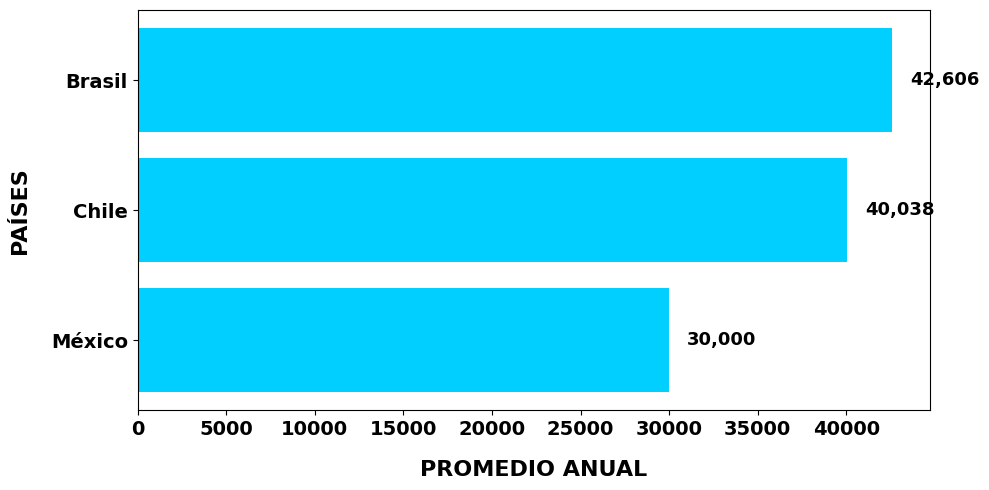

In [ ]:
import matplotlib.pyplot as plt

# se Filtra solo Data Scientist
df_ds = df_latam[df_latam['Categoría Rol'] == 'Data Scientist']

# se Calcula el top 3 países con mejor salario promedio
top3_ds = (
    df_ds.groupby('Ubicación de la empresa')['Salario en USD']
    .mean()
    .sort_values(ascending=False)
    .head(3)
    .round(0)
    .astype(int)
)

# códigos de país a nombres
paises = {
    'BR': 'Brasil',
    'CL': 'Chile',
    'MX': 'México',
    'CO': 'Colombia',
    'AR': 'Argentina',
    'CR': 'Costa Rica',
    'PR': 'Puerto Rico',
    'BO': 'Bolivia',
    'HN': 'Honduras'
}
top3_ds.index = top3_ds.index.map(paises)

# se comnvierte a DataFrame
df_top3 = top3_ds.reset_index()
df_top3.columns = ['País', 'Promedio Anual (USD)']

# se crea gráfico
plt.figure(figsize=(10, 5))
bars = plt.barh(df_top3['País'], df_top3['Promedio Anual (USD)'], color='#00CFFF')

# mismo estilo visual que uso en mis diseños de Linkedin y redes
plt.xlabel('PROMEDIO ANUAL', fontsize=16, fontweight='bold', labelpad=15)
plt.ylabel('PAÍSES', fontsize=16, fontweight='bold', labelpad=15)
plt.xticks(fontsize=14, fontweight='bold')
plt.yticks(fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.gca().set_facecolor('white')
plt.gcf().set_facecolor('white')

# Etiquetas al final de las barras
for bar in bars:
    width = bar.get_width()
    plt.text(width + 1000, bar.get_y() + bar.get_height() / 2,
             f'{width:,.0f}', va='center', fontsize=13, fontweight='bold')

plt.tight_layout()
plt.show()


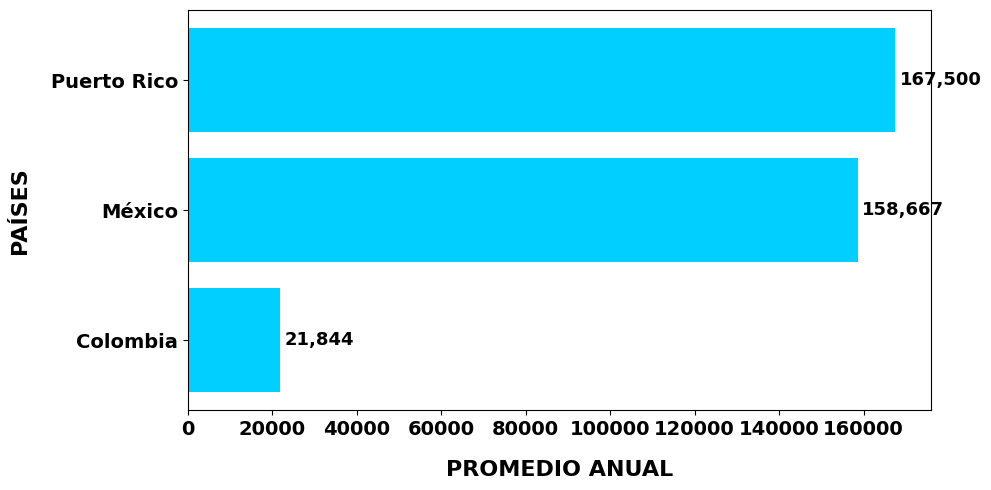

In [ ]:

# se Filtra solo los registros del rol "Machine Learning"
df_ml = df_latam[df_latam['Categoría Rol'] == 'Machine Learning']

# se Calcula el top 3 países con mejor salario promedio anual (en USD)
top3_ml = (
    df_ml.groupby('Ubicación de la empresa')['Salario en USD']
    .mean()
    .sort_values(ascending=False)
    .head(3)
    .round(0)
    .astype(int)
)

# se Traduce el código de país a nombre completo
paises = {
    'BR': 'Brasil',
    'CL': 'Chile',
    'MX': 'México',
    'CO': 'Colombia',
    'AR': 'Argentina',
    'CR': 'Costa Rica',
    'PR': 'Puerto Rico',
    'BO': 'Bolivia',
    'HN': 'Honduras'
}
top3_ml.index = top3_ml.index.map(paises)

# se Convierte a DataFrame para graficar
df_top3_ml = top3_ml.reset_index()
df_top3_ml.columns = ['País', 'Promedio Anual (USD)']

# se Crea el gráfico horizontal con estilo personalizado
plt.figure(figsize=(10, 5))
bars = plt.barh(df_top3_ml['País'], df_top3_ml['Promedio Anual (USD)'], color='#00CFFF')

# mismo estilo visual
plt.xlabel('PROMEDIO ANUAL', fontsize=16, fontweight='bold', labelpad=15)
plt.ylabel('PAÍSES', fontsize=16, fontweight='bold', labelpad=15)
plt.xticks(fontsize=14, fontweight='bold')
plt.yticks(fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.gca().set_facecolor('white')
plt.gcf().set_facecolor('white')

# se Agregan etiquetas numéricas al final de cada barra
for bar in bars:
    width = bar.get_width()
    plt.text(width + 1000, bar.get_y() + bar.get_height() / 2,
             f'{width:,.0f}', va='center', fontsize=13, fontweight='bold')

plt.tight_layout()
plt.show()

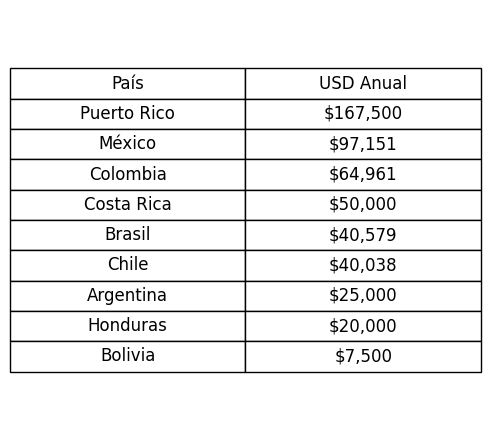

In [ ]:


# se Calcula el salario promedio anual por país de LATAM
tabla_latam = (
    df_latam.groupby('Ubicación de la empresa')['Salario en USD']
    .mean()
    .round(0)
    .astype(int)
    .sort_values(ascending=False)
)

# se Mapean los códigos ISO a nombres de países
paises_latam = {
    'BR': 'Brasil',
    'CL': 'Chile',
    'MX': 'México',
    'CO': 'Colombia',
    'AR': 'Argentina',
    'CR': 'Costa Rica',
    'PR': 'Puerto Rico',
    'BO': 'Bolivia',
    'HN': 'Honduras'
}
tabla_latam.index = tabla_latam.index.map(paises_latam)

# se Formatea el salario con símbolo y separador
df_tabla = pd.DataFrame({
    'País': tabla_latam.index,
    'USD Anual': tabla_latam.apply(lambda x: f"${x:,.0f}")
}).reset_index(drop=True)

# se Genera la imagen con la tabla
fig, ax = plt.subplots(figsize=(5, 4.5))
ax.axis('off')

# se Crea tabla visual centrada
tabla = ax.table(cellText=df_tabla.values,
                 colLabels=df_tabla.columns,
                 cellLoc='center',
                 loc='center',
                 colColours=["white", "white"])

# se Ajusta estilo visual
tabla.auto_set_font_size(False)
tabla.set_fontsize(12)
tabla.scale(1.2, 1.5)

# se Ajusta diseño
plt.tight_layout()


plt.show()
